In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('D:/Data Visualization Project/style-table.css').read() + open('D:/Data Visualization Project/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('D:/Data Visualization Project/titles.csv')
titles.head()

,title,year
0,Captain of His Soul,1918
1,Qing chun xing,1975
2,Tangled Web (II),2008
3,The Shepherd of the Hills,1919
4,Anna mit'n Flimmerfimmel,1919


In [4]:
cast = pd.read_csv('D:/Data Visualization Project/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

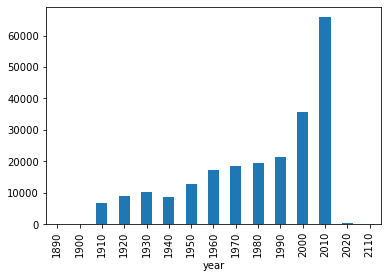

In [8]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

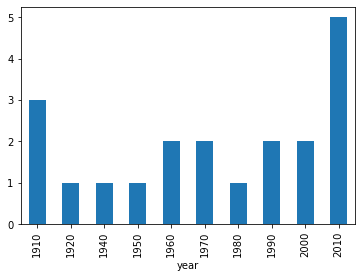

In [9]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [11]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      622
      actress    287
1951  actor      640
      actress    283
1952  actor      605
      actress    300
1953  actor      648
      actress    305
1954  actor      616
      actress    311
1955  actor      634
      actress    281
1956  actor      651
      actress    304
1957  actor      700
      actress    303
1958  actor      674
      actress    292
1959  actor      692
      actress    319
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [12]:
c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6482
     actress    2985
2.0  actor      4520
     actress    4496
3.0  actor      5489
     actress    3109
4.0  actor      5479
     actress    2820
5.0  actor      5493
     actress    2531
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [31]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [33]:
c = cast
c = c[c.name == 'Frank Oz']
group = c.groupby(['year', 'title']).size()
group[group > 1]

year  title                               
1979  The Muppet Movie                        8
1981  The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [ ]:
c = cast
c = c[c.name == 'Frank Oz']
group = c.groupby(['character']).size()